In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image


In [35]:
data_dir = r"D:\CA-Makeen\week9\DL_Project\fire_dataset"  
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,         # 20% will be used for validation
    subset="training",
    seed=123,                     # ensures the split is consistent
    image_size=(224, 224),        # resize images to match model input
    batch_size=32,
    label_mode='binary'           # since it's fire / non-fire
)

# Validation dataset (20%)
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary'
)

Found 999 files belonging to 2 classes.
Using 800 files for training.
Found 999 files belonging to 2 classes.
Using 199 files for validation.


In [36]:
# 👇 Save the class names before mapping (IMPORTANT!)
class_names = ['FIRE', 'NO FIRE']

# 👇 Now apply normalization safely
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Because it's binary classification
])


In [38]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [39]:
model.fit(train_ds, epochs=5)


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 847ms/step - accuracy: 0.6546 - loss: 1.4892
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9232 - loss: 0.1879
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 957ms/step - accuracy: 0.9635 - loss: 0.0920
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9786 - loss: 0.0690
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 970ms/step - accuracy: 0.9755 - loss: 0.0735


In [40]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 470ms/step - accuracy: 0.9409 - loss: 0.1960
Validation Loss: 0.1431
Validation Accuracy: 0.9598


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


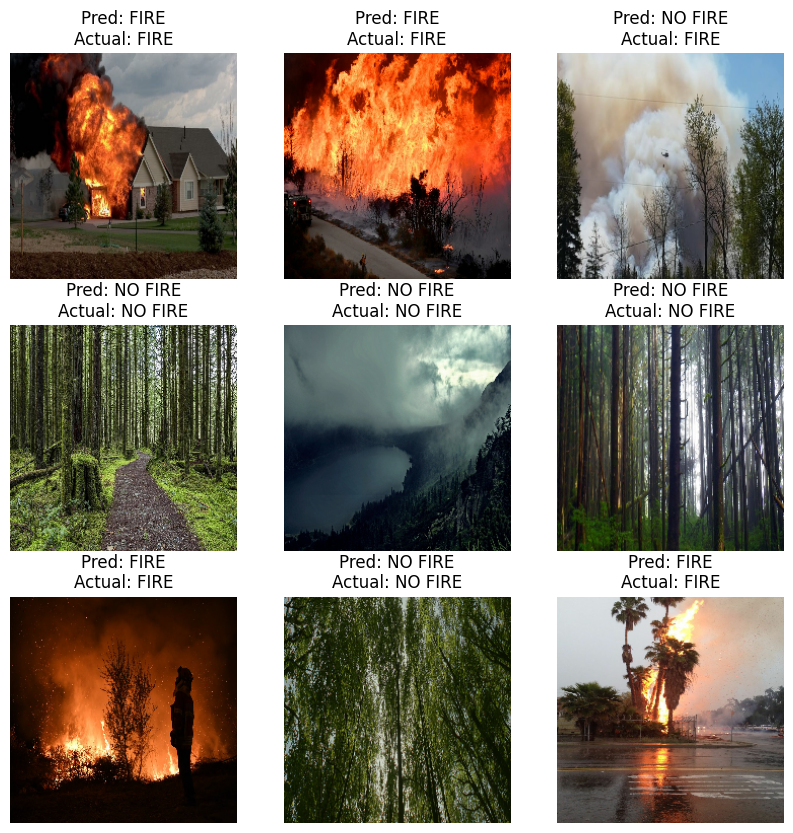

In [41]:
# Take a batch from val_ds
for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    predicted_labels = (predictions > 0.5).astype("int")

    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(f"Pred: {class_names[predicted_labels[i][0]]}\nActual: {class_names[int(labels[i])]}")
        plt.axis("off")
    plt.show()
